In [1]:
%matplotlib inline

<p style="text-align: center;"> Y Py?</p>

<img src="images/zendesk.jpg" width=500>
### Chris Hausler
### Data Engineer @ Zendesk



<br><br>
 <center><img src="images/anaconda_logo_web.png"/><br>
 <b><a href="http://continuum.io/downloads">http://continuum.io/downloads</a></b><br/><br/><br>
Completely free enterprise-ready Python distribution for large-scale<br><br> data processing, predictive analytics, and scientific computing

</center>
  
  





#What I want from my data stack
* Munging
* Plotting
* Learning
* Productionising
* Collaborating

#Munging

*And introduction to Pandas*

###Pandas

In [3]:
import pandas as pd

###Data Frames

In [3]:
ages = pd.DataFrame([['John', 25],
                     ['Mary', 9],
                     ['Radek', 16],
                     ['Mia', 64],
                     ['Geroge', 4],
                     ['Katrin', 21]])
ages

,0,1
0,John,25
1,Mary,9
2,Radek,16
3,Mia,64
4,Geroge,4
5,Katrin,21


###Column Names and Index

In [4]:
ages.columns = ['Name', 'Age']
ages.set_index('Name', inplace=True)
ages

,Age
Name,
John,25
Mary,9
Radek,16
Mia,64
Geroge,4
Katrin,21


###Using the Index

In [5]:
ages.ix[['John', 'Mary']]

,Age
Name,
John,25
Mary,9


In [6]:
ages.ix[['John', 'Mary', 'Thomas']]

,Age
Name,
John,25
Mary,9
Thomas,NaN


### Basic Arithmetic

In [7]:
ages * 2

,Age
Name,
John,50
Mary,18
Radek,32
Mia,128
Geroge,8
Katrin,42


###Another DataFrame

In [8]:
genders = pd.DataFrame(['male', 'female', 'male', 'female'],
                       index=['John', 'Mary', 'Alberto', 'Karyn'],
                       columns=['Gender'])
genders

,Gender
John,male
Mary,female
Alberto,male
Karyn,female


### Joins

In [9]:
people = genders.join(ages, how='left')
people

,Gender,Age
John,male,25
Mary,female,9
Alberto,male,NaN
Karyn,female,NaN


###Dealing with Missing Values

In [10]:
people

,Gender,Age
John,male,25
Mary,female,9
Alberto,male,NaN
Karyn,female,NaN


####1. Get rid of them

In [11]:
people.dropna()

,Gender,Age
John,male,25
Mary,female,9


####2. Fill them with something

In [12]:
people.fillna(people.Age.mean())

,Gender,Age
John,male,25
Mary,female,9
Alberto,male,17
Karyn,female,17


####3. Use a function like forward fill

In [13]:
people.fillna(method='ffill')

,Gender,Age
John,male,25
Mary,female,9
Alberto,male,9
Karyn,female,9


###Loading Data
* read_csv
* read_excel
* read_hdf
* read_sql
* read_json
* read_clipboard
* ....

###Get some real data

In [14]:
data = pd.read_csv('pedestrian_count.csv', index_col=0, parse_dates=[0])
data.head()

,Webb Bridge,Princes Bridge,Sandridge Bridge,Flagstaff Station,Southern Cross,Flinders St Underpass
datetime,,,,,,
2012-01-01 00:00:00,325,4171,479,157,325,3726
2012-01-01 01:00:00,169,2843,1011,105,246,3082
2012-01-01 02:00:00,52,2153,1346,39,131,2784
2012-01-01 03:00:00,58,967,1034,34,135,1915
2012-01-01 04:00:00,18,404,532,26,56,959


### Basic Info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24840 entries, 2012-01-01 00:00:00 to 2014-10-31 23:00:00
Data columns (total 6 columns):
Webb Bridge              24839 non-null float64
Princes Bridge           24839 non-null float64
Sandridge Bridge         24839 non-null float64
Flagstaff Station        24838 non-null float64
Southern Cross           24838 non-null float64
Flinders St Underpass    24839 non-null float64
dtypes: float64(6)
memory usage: 1.3 MB


###Descriptive stats

In [16]:
data.describe()

,Webb Bridge,Princes Bridge,Sandridge Bridge,Flagstaff Station,Southern Cross,Flinders St Underpass
count,24839.000000,24839.000000,24839.000000,24838.000000,24838.000000,24839.000000
mean,155.988365,962.633922,358.524135,728.788067,483.479185,938.448609
std,168.814128,771.431942,292.257342,1141.001283,695.961824,782.781912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,194.000000,109.000000,33.000000,32.000000,209.500000
50%,111.000000,930.000000,328.000000,104.000000,123.000000,869.000000
75%,221.000000,1520.000000,510.000000,1033.000000,679.750000,1404.500000
max,1904.000000,6851.000000,3898.000000,7456.000000,3577.000000,4472.000000


#Plotting

*And advanced Pandas operations*

In [13]:
import pylab as plt
import seaborn as sns
sns.set_context('poster')

###Bridge pedestrian counts

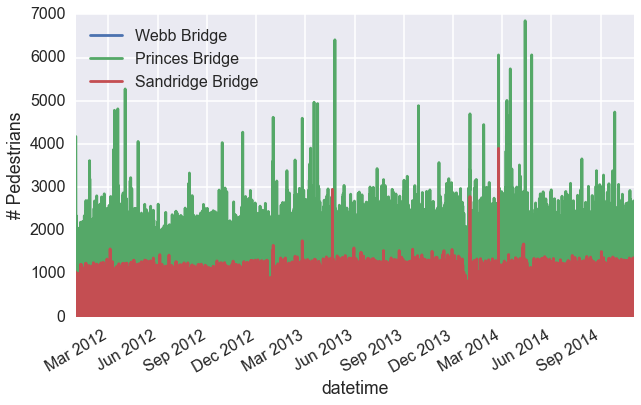

In [18]:
bridges = data[['Webb Bridge', 'Princes Bridge', 'Sandridge Bridge']]
ax = bridges.plot(figsize=(10, 6))
_ = ax.set_ylabel('# Pedestrians')

### Daily totals for pedestrians

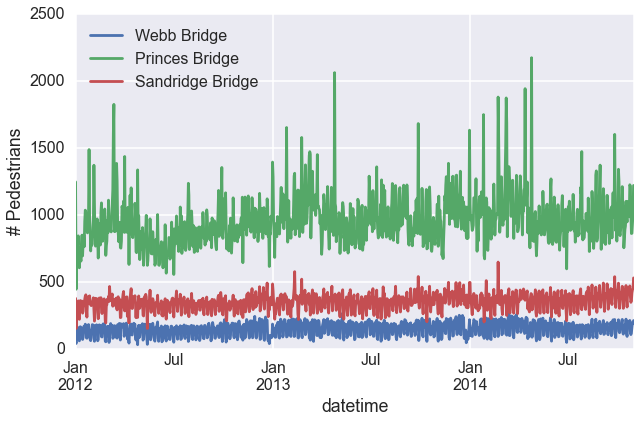

In [19]:
ax = bridges.resample('D', how='mean').plot(figsize=(10, 6))
_ = ax.set_ylabel('# Pedestrians')

###Daily average in individual sub-plots

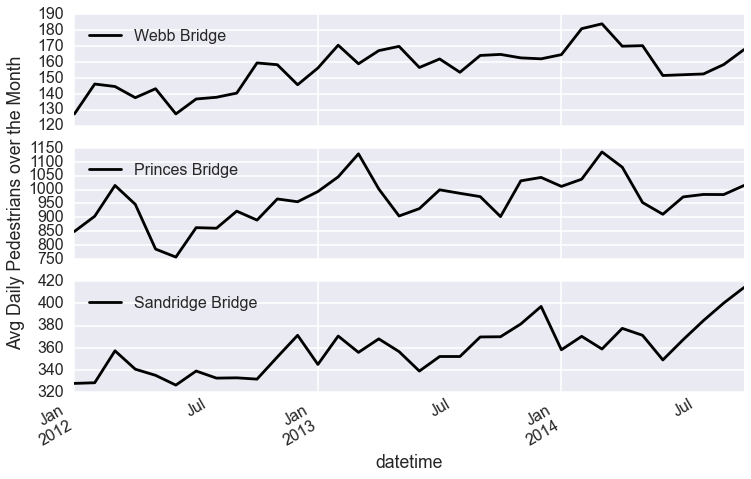

In [20]:
axs = bridges.resample('M', how='mean').plot(subplots=True, figsize=(12, 7.5))
_ = axs[1].set_ylabel('Avg Daily Pedestrians over the Month')

###Median Pedestrians per hour, Flagstaff July 2013

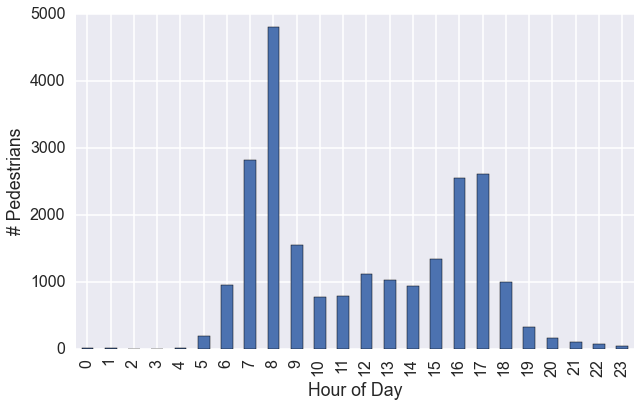

In [21]:
dt = data.ix['2014-07']['Flagstaff Station']
ax = dt.groupby(dt.index.hour).median().plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('# Pedestrians')
_ = ax.set_xlabel('Hour of Day')

### Count distribution at each location

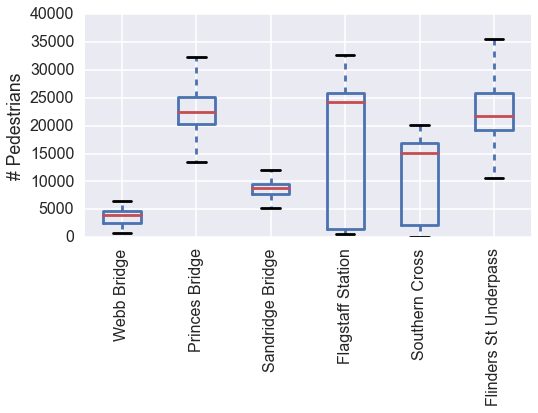

In [33]:
fig, ax = plt.subplots(1, figsize=(8, 4))
data.resample('D', how='sum').boxplot(ax=ax)
ax.set_xticklabels(data.columns, rotation=90, size=16)
ax.set_ylim(0, 40000)
_ = ax.set_ylabel('# Pedestrians')

### Scatter Plots

In [ ]:
with sns.axes_style("white"):
    sns.jointplot('Princes Bridge', 'Flinders St Underpass', data, size=7);

# (Machine) Learning

*And Introduction to Scikit-Learn*

<img src="images/ml_map.png" width=1000/>

### Load some Titanic Data

In [134]:
titanic = pd.read_csv('train.csv').drop(['Name', 'Ticket', 'PassengerId'],
                                        axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,NaN,S
1,1,1,female,38,1,0,71.2833,C85,C
2,1,3,female,26,0,0,7.9250,NaN,S
3,1,1,female,35,1,0,53.1000,C123,S
4,0,3,male,35,0,0,8.0500,NaN,S


###Make some new features / cleanup

In [135]:
titanic["Alone"] = ((titanic.Parch + titanic.SibSp) == 0) * 1
titanic['Cabin'] = titanic.Cabin.fillna('NA')
titanic['Embarked'] = titanic.Embarked.fillna('NA')
titanic['Age'] = titanic.Age.fillna(titanic.Age.median())
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone
0,0,3,male,22,1,0,7.2500,NA,S,0
1,1,1,female,38,1,0,71.2833,C85,C,0
2,1,3,female,26,0,0,7.9250,NA,S,1
3,1,1,female,35,1,0,53.1000,C123,S,0
4,0,3,male,35,0,0,8.0500,NA,S,1


###Survival Probability

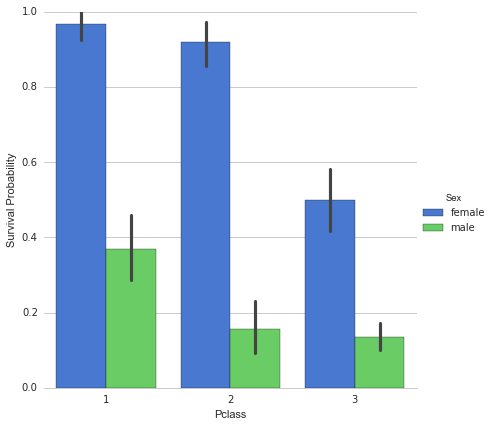

In [138]:
g = sns.factorplot("Pclass", "Survived", "Sex",
                    data=df, kind="bar",
                    size=6, palette="muted")
g.despine(left=True)
_ = g.set_ylabels("Survival Probability")

###Building Categorical Features

In [136]:
from sklearn.preprocessing import LabelBinarizer
lbl = LabelBinarizer().fit(titanic.Embarked)
print lbl.classes_
print lbl.transform(titanic.Embarked)

['C' 'NA' 'Q' 'S']
[[0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 ..., 
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]


### We can do them all at once

In [139]:
import numpy as np

lbl = LabelBinarizer()
X_categorical = np.hstack([lbl.fit_transform(titanic[c])
                           for c in ['Cabin', 'Embarked', 'Sex']])
print X_categorical.shape

(891, 153)


###The Dataset

In [120]:
y = titanic.pop('Survived').values

X_numeric = titanic._get_numeric_data().values
X = np.hstack([X_numeric, X_categorical])

### First Pass Cross-Validation

In [169]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log')
scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
print "Accuracy: {:.2f}".format(scores.mean())

0.0001
Accuracy: 0.70


###Can we do better?

In [172]:
for a in [0.0001, 0.001, 0.01, 0.1, 1., 10, 100]:
    clf = SGDClassifier(loss='log', alpha=a)
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')    
    print "Alpha: {:.4f}\tAccuracy: {:.2f}".format(a, scores.mean())

Alpha: 0.0001	Accuracy: 0.60
Alpha: 0.0010	Accuracy: 0.58
Alpha: 0.0100	Accuracy: 0.61
Alpha: 0.1000	Accuracy: 0.65
Alpha: 1.0000	Accuracy: 0.66
Alpha: 10.0000	Accuracy: 0.68
Alpha: 100.0000	Accuracy: 0.67


###Can we do even better??

In [182]:
from sklearn.grid_search import RandomizedSearchCV

params = {'alpha': np.logspace(-4, 4, 50),
          'loss': ['log', 'modified_huber', 'perceptron'],
          'penalty': ['l1', 'l2'],
          'n_iter': [50, 100, 200]}
clf = SGDClassifier()
random_search  = RandomizedSearchCV(clf, params, n_iter=100,
                                    scoring='accuracy', n_jobs=4,
                                    verbose=1)
random_search.fit(X, y)
print "Best Accuracy: {:.2f}".format(random_search.best_score_)
print random_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 jobs       | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 200 jobs       | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 294 out of 300 | elapsed:    7.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    7.3s finished


Best Accuracy: 0.80
{'penalty': 'l1', 'alpha': 0.00095409547634999435, 'n_iter': 200, 'loss': 'modified_huber'}


### What about different classifiers?

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [
    SGDClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression(class_weight='auto')]


In [211]:
res = []
names = []
for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    names.append(clf.__class__.__name__)
    res.append(scores.mean())

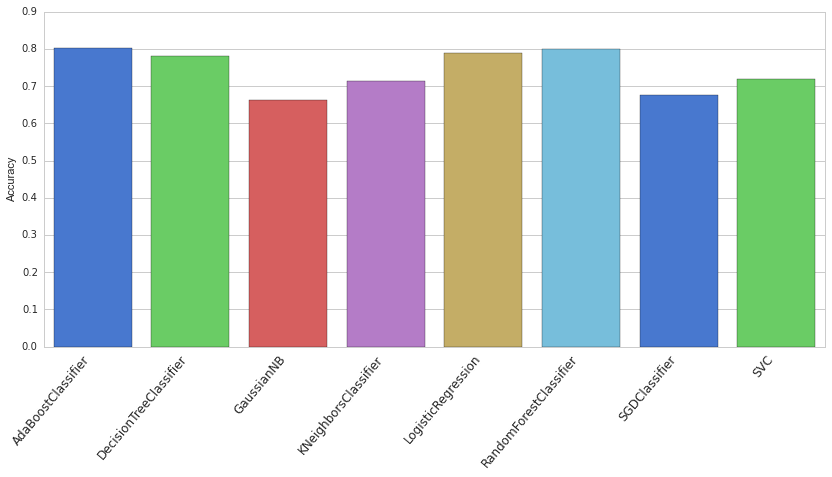

In [219]:
fig, ax = plt.subplots(1, figsize=(14, 6))
sns.barplot(names, res, ci=None,  palette="muted", ax=ax)
ax.set_ylabel("Accuracy")
_ = plt.xticks(rotation=50, ha='right', size=12)


#Productionising

*And full stack development*


<b style="color:dimgray">Munging & Adhoc Analysis:</b><br>
<span style="font-size:80%">`Pandas, Scipy, Beautifulsoup`</span>

<b style="color:dimgray">Visualisation:</b><br>
<span style="font-size:80%"> `Matplotlib, seaborn, bokeh, ggplot2`  </span>

<b style="color:dimgray">Model Building:</b><br>
<span style="font-size:80%"> `Scikit-Learn, StatsModels`</span>  

<b style="color:dimgray">Serving Results or Models:</b><br>
<span style="font-size:80%"> `Flask, Django, Tornado`</span>      

<b style="color:dimgray">Testing:</b><br>
<span style="font-size:80%"> `Pytest, pyunit, nose`</span>

### Testing
<img src="images/jenga.jpg" width=300/>


###Scaling
<img src="images/spark-logo.png" width=400>

#Collaborating

*And using IPython Notebooks*

<img src="images/ipython_notebook.png" width=650>

#PS> We're hiring

* Front End Engineer
* Data Engineer
* Test Engineer
<br/><br/><br/>
<div align='right'><a>chausler@zendesk.com</a></div>